In [1]:
from sympy import MatrixSymbol, Matrix, Identity

import sympy as sym
import pandas as pd

sym.init_printing()
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import control
import random

# IDENTIFICACIÓN DE SISTEMAS

Profesor: Jairo Alberto Cuéllar Guarnizo  
Programa: Ingeniería en Automatización y Control

# Unidad 1 - Introducción y Conceptos Básicos  

## ¿Qué es la identificación de sistemas?

CONCEPTO 1 - Es el conjunto de herramientas y experimentos que se diseñan y utilizan para lograr aproximar un modelo matemático de un sistema dinámico sobre el cuál se pueden realizar mediciones de sus entradas y salidas.

CONCEPTO 2 - Uso de métodos estadísticos para lograr la aproximación de un modelo matemático de un sistema cuya información paramétrica es desconocida parcial o totalmente, y del cual se cuenta con mediciones de las variables de interés.

## Ejemplo estimación de R  

Partiendo del desconocimiento del Modelo (R), se cuenta únicamente con los valores de las señales de interés que son el voltaje y la corriente. Y esperando aproximar aún mejor el modelo se toma un número N de mediciones.  

![R - Experimento](figuras/01_ejemplo_R.png)

El resultado del experimento puede ser similar a las siguientes señales, aunque las mediciones mostradas aquí oscilan alrededor de un valor determinado (50V y 10A), pero no necesariamente debió ser así.  

![Senales_VI](figuras/voltaje_corriente.png)

La ley de ohm brinda una herramienta matemática que permite estimar un valor para el modelo del sistema desconocido.
Si se observa la dispersión de las variables todos los valores deberían converger al mismo punto, sin embargo se han tenido en cuenta errores en las mediciones realizadas (perturbaciones del sistema).  

![Dispersion_VI](figuras/dispersion_vi.png)

**Aproximación Simple**

En este tipo de aproximación se promedia el valor de la Resistencia que se obtuvo en cada experimento realizado.

\begin{equation}
R_1[N] = \frac{1}{N}\sum_{k=1}^{N}\frac{V[k]}{I[k]}
\end{equation}  

**Error en cada Variable**

En este tipo de aproximación se promedia el valor cada variable y luego se calcula el valor de la resistencia aplicando la Ley de Ohm.

\begin{equation}
R_2[N] = \frac{\frac{1}{N}\sum_{k=1}^{N}V[k]}{\frac{1}{N}\sum_{k=1}^{N}I[k]}
\end{equation} 

**Mínimos cuadrados**

En este caso la idea es encontrar R[N] minimizando la suma de la diferencia de cuadrados del modelo estimado del voltaje basado en la medición de I y la propia medición de V. La ecuación sería:

\begin{equation}
R_3[N] = arg min\sum_{k=1}^{N}\left(RI[k]-V[k]\right)^2
\end{equation} 

Derivando la función a minimizar (Hacer la derivada) e igualando a cero, se puede obtener la aproximación de R que es lo que realmente interesa:

\begin{equation}
R_3[N] = \frac{\frac{1}{N}\sum_{k=1}^{N}I[k] \cdot V[k]}{\frac{1}{N}\sum_{k=1}^{N}I[k]^2}
\end{equation} 

## Estimación usando Listas

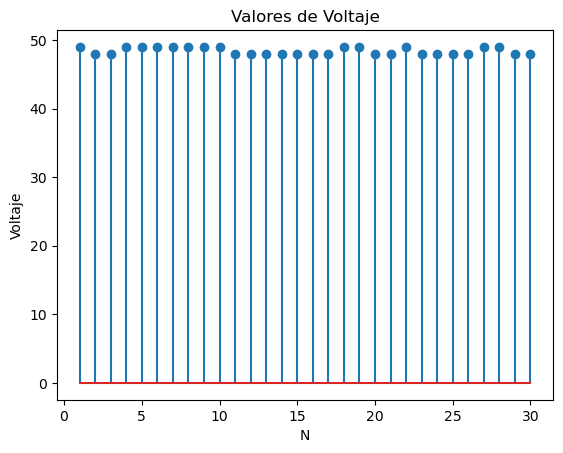

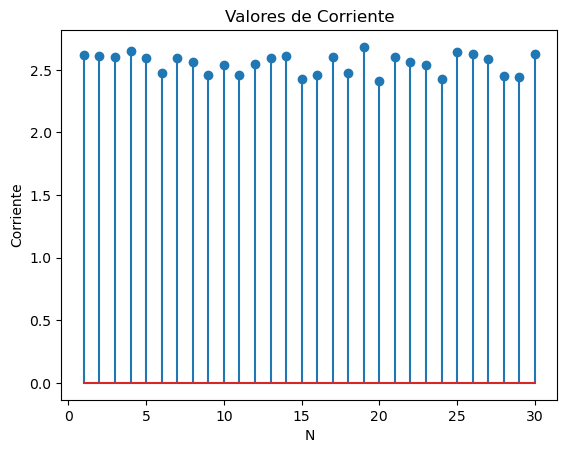

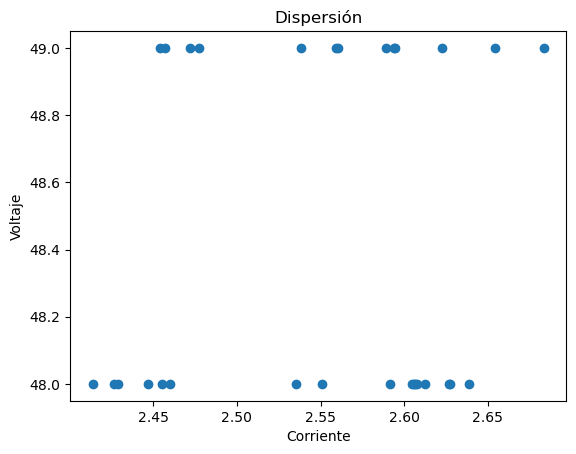

In [3]:
# Datos a utilizar
vk = []
ik = []
N = 30
Nk = []
V_p = I_p = P_p = 0;
R1 = R2 = R3 = 0;
Rv = 20;
#R_1 = =R_2 = R_3 = []

for k in range(N):
    Nk.append(k+1)
    vk.append(random.randrange(48,50))
    ik.append((vk[k]/Rv)*(1+(random.random())/10))

plt.stem(Nk,vk)
plt.xlabel('N')
plt.ylabel('Voltaje')
plt.title('Valores de Voltaje')
plt.show()

plt.stem(Nk,ik)
plt.xlabel('N')
plt.ylabel('Corriente')
plt.title('Valores de Corriente')
plt.show()

plt.scatter(ik,vk)
plt.xlabel('Corriente')
plt.ylabel('Voltaje')
plt.title('Dispersión')
plt.show()

In [4]:
# Aproximación simple
R1 = R2 = R3 = k = 0
for k in range(N):
    R1 = R1+(vk[k]/ik[k])
R1 = R1/len(vk)
print("Aproximación simple: "+str(R1))


# Error en cada Variable
k = V_p = I_p = P_p = 0

V_p = sum(vk)/len(vk)
I_p = sum(ik)/len(ik)
R2 = V_p/I_p
print("Error en variable: "+str(R2))

# Mínimos cuadrados
temp = k = 0
for k in range(N):
    P_p = P_p + vk[k]*ik[k]
    temp = temp + ik[k]*ik[k]
P_p = P_p/len(vk)
temp = temp/len(ik)
R3 = P_p/temp
print("Minimos cuadrados: "+str(R3))


Aproximación simple: 19.01194975090301
Error en variable: 18.994467910620443
Minimos cuadrados: 18.977181931756963
